<a href="https://colab.research.google.com/github/ABChaeeun/ITB_Project/blob/main/dataclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터 불러오기
먼저 엑셀로 용산구 내의 대여소를 추출해 데이터를 일차적으로 전처리함.
- 용산구 내 따릉이 대여소 : 800-870, 4602-4639
- 서울 열린데이터 광장 사이트에서 [서울시 공공자전거 이용정보(월별)] 1-6월의 데이터를 다운받아 [대여소번호] 컬럼을 활용해 용산구 대여소를 필터링함.
(https://data.seoul.go.kr/dataList/OA-15248/F/1/datasetView.do#)

In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [90]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# 용산구 대여소의 1-6월 이용정보 데이터
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ITB/hw/final_teamproject/따릉이_용산구 1-6월 이용정보.csv', encoding = 'cp949')
data.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,1,800,800. 목월공원 앞,단체,M,40대,2,176.71,1.38,5949.60,120
1,1,800,800. 목월공원 앞,일일(비회원),\N,기타,2,120.28,1.08,4672.74,58
2,1,800,800. 목월공원 앞,일일(회원),\N,10대,6,535,4.34,18764.02,570
3,1,800,800. 목월공원 앞,일일(회원),\N,20대,14,1097.91,9.42,40631.75,379
4,1,800,800. 목월공원 앞,일일(회원),\N,30대,5,178.77,1.51,6497.15,140


In [7]:
# 대여일자, 이동거리, 이용시간 컬럼명 바꾸기
data = data.rename(columns = {'대여일자':'월'})
data = data.rename(columns = {'이동거리(M)':'이동거리'})
data = data.rename(columns = {'이용시간(분)':'이용시간'})

In [8]:
data

,월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,1,800,800. 목월공원 앞,단체,M,40대,2,176.71,1.38,5949.60,120
1,1,800,800. 목월공원 앞,일일(비회원),\N,기타,2,120.28,1.08,4672.74,58
2,1,800,800. 목월공원 앞,일일(회원),\N,10대,6,535,4.34,18764.02,570
3,1,800,800. 목월공원 앞,일일(회원),\N,20대,14,1097.91,9.42,40631.75,379
4,1,800,800. 목월공원 앞,일일(회원),\N,30대,5,178.77,1.51,6497.15,140
...,...,...,...,...,...,...,...,...,...,...,...
22456,6,4639,4639. 동빙고근린공원,정기,M,30대,8,686.79,5.67,24405.69,344
22457,6,4639,4639. 동빙고근린공원,정기,M,40대,15,2900.89,22.47,96820.20,566
22458,6,4639,4639. 동빙고근린공원,정기,M,50대,9,1600.71,14.41,62087.24,459
22459,6,4639,4639. 동빙고근린공원,정기,M,60대,1,37.39,0.32,1388.41,9


In [9]:
data.info()
# 성별 내 null 값 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22461 entries, 0 to 22460
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월       22461 non-null  int64  
 1   대여소번호   22461 non-null  int64  
 2   대여소명    22461 non-null  object 
 3   대여구분코드  22461 non-null  object 
 4   성별      19964 non-null  object 
 5   연령대코드   22461 non-null  object 
 6   이용건수    22461 non-null  int64  
 7   운동량     22461 non-null  object 
 8   탄소량     22461 non-null  object 
 9   이동거리    22461 non-null  float64
 10  이용시간    22461 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 1.9+ MB


In [10]:
# 성별 내 값 확인하기
# 서울 열린데이터 광장 : \N 및 공백(null) = 성별 정보 선택X
data['성별'].value_counts()

M     7157
\N    6607
F     6189
m        9
f        2
Name: 성별, dtype: int64

In [11]:
# 성별 null에 0으로 값 대체
data = data.fillna(0)

In [12]:
# 성별 컬럼의 행이 m,f이면 삭제
data = data.drop(index = data[data['성별'] == 'm'].index)
data = data.drop(index = data[data['성별'] == 'f'].index)

In [13]:
data['성별'].value_counts()

M     7157
\N    6607
F     6189
0     2497
Name: 성별, dtype: int64

In [14]:
# 공백(\N) 값을 0으로 바꾸기 
data['성별'] = data['성별'].replace(['\\N'],[0])

In [15]:
data['성별'].value_counts()

0    9104
M    7157
F    6189
Name: 성별, dtype: int64

In [16]:
# 성별 남, 여, 0 = 1, 2, 3
data['성별'] = data['성별'].replace(['M','F'],['1','2'])

In [17]:
data['성별'].value_counts()

0    9104
1    7157
2    6189
Name: 성별, dtype: int64

In [18]:
data['연령대코드'].value_counts()

20대      4415
30대      3962
40대      3505
기타       3375
50대      2786
10대      2314
60대      1623
70대이상     470
Name: 연령대코드, dtype: int64

In [19]:
# 연령대코드 값 바꾸기
data['연령대코드'] = data['연령대코드'].replace(['20대','30대', '40대', '기타', '50대', '10대', '60대', '70대이상'],['2','3','4','0','5','1','6','7'])

In [20]:
data['연령대코드'].value_counts()

2    4415
3    3962
4    3505
0    3375
5    2786
1    2314
6    1623
7     470
Name: 연령대코드, dtype: int64

In [21]:
# 이용건수, 운동량, 탄소량, 이동거리, 이용시간이 0인 값
data.query('이용건수 == 0').count()

월         0
대여소번호     0
대여소명      0
대여구분코드    0
성별        0
연령대코드     0
이용건수      0
운동량       0
탄소량       0
이동거리      0
이용시간      0
dtype: int64

In [22]:
data.query('운동량 == 0').count()

월         0
대여소번호     0
대여소명      0
대여구분코드    0
성별        0
연령대코드     0
이용건수      0
운동량       0
탄소량       0
이동거리      0
이용시간      0
dtype: int64

In [23]:
data.query('탄소량 == 0').count()

월         0
대여소번호     0
대여소명      0
대여구분코드    0
성별        0
연령대코드     0
이용건수      0
운동량       0
탄소량       0
이동거리      0
이용시간      0
dtype: int64

In [24]:
data.query('이동거리 == 0').count()

월         365
대여소번호     365
대여소명      365
대여구분코드    365
성별        365
연령대코드     365
이용건수      365
운동량       365
탄소량       365
이동거리      365
이용시간      365
dtype: int64

In [25]:
data.query('이용시간 == 0').count()

월         9
대여소번호     9
대여소명      9
대여구분코드    9
성별        9
연령대코드     9
이용건수      9
운동량       9
탄소량       9
이동거리      9
이용시간      9
dtype: int64

In [26]:
# 0 값 없애기
data = data.drop(index = data[data['이동거리'] == 0].index)
data = data.drop(index = data[data['이용시간'] == 0].index)

In [27]:
data

,월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,1,800,800. 목월공원 앞,단체,1,4,2,176.71,1.38,5949.60,120
1,1,800,800. 목월공원 앞,일일(비회원),0,0,2,120.28,1.08,4672.74,58
2,1,800,800. 목월공원 앞,일일(회원),0,1,6,535,4.34,18764.02,570
3,1,800,800. 목월공원 앞,일일(회원),0,2,14,1097.91,9.42,40631.75,379
4,1,800,800. 목월공원 앞,일일(회원),0,3,5,178.77,1.51,6497.15,140
...,...,...,...,...,...,...,...,...,...,...,...
22456,6,4639,4639. 동빙고근린공원,정기,1,3,8,686.79,5.67,24405.69,344
22457,6,4639,4639. 동빙고근린공원,정기,1,4,15,2900.89,22.47,96820.20,566
22458,6,4639,4639. 동빙고근린공원,정기,1,5,9,1600.71,14.41,62087.24,459
22459,6,4639,4639. 동빙고근린공원,정기,1,6,1,37.39,0.32,1388.41,9


In [28]:
# 운동량, 탄소량 변수 척도 numeric으로 변환
data['운동량'] = pd.to_numeric(data['운동량'])
data['탄소량'] = pd.to_numeric(data['탄소량'])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22082 entries, 0 to 22460
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월       22082 non-null  int64  
 1   대여소번호   22082 non-null  int64  
 2   대여소명    22082 non-null  object 
 3   대여구분코드  22082 non-null  object 
 4   성별      22082 non-null  object 
 5   연령대코드   22082 non-null  object 
 6   이용건수    22082 non-null  int64  
 7   운동량     22082 non-null  float64
 8   탄소량     22082 non-null  float64
 9   이동거리    22082 non-null  float64
 10  이용시간    22082 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.0+ MB


In [30]:
data.describe()

,월,대여소번호,이용건수,운동량,탄소량,이동거리,이용시간
count,22082.000000,22082.000000,22082.000000,22082.000000,22082.000000,2.208200e+04,22082.000000
mean,3.802328,1884.495834,18.719636,1779.141492,15.585047,6.717756e+04,550.408432
std,1.646822,1693.914867,34.591564,3691.986182,32.419028,1.397372e+05,1089.898382
min,1.000000,800.000000,1.000000,0.000000,0.000000,1.000000e-01,1.000000
25%,3.000000,825.000000,2.000000,162.865000,1.472500,6.363267e+03,62.000000
50%,4.000000,847.000000,6.000000,517.710000,4.550000,1.964395e+04,183.000000
75%,5.000000,4604.000000,20.000000,1717.702500,15.110000,6.514006e+04,560.000000
max,6.000000,4639.000000,662.000000,58946.650000,564.600000,2.433549e+06,23669.000000


## 2. EDA

In [31]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 124015 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c4fb8aca0>,
      dtype=object)

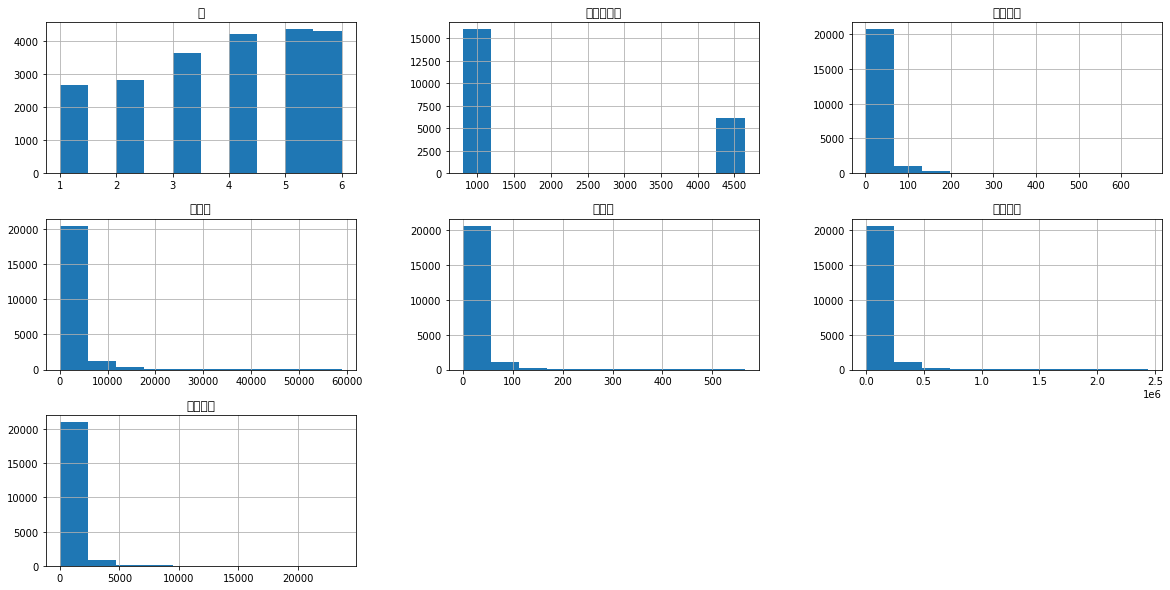

In [32]:
# histogram
pd.DataFrame(data).hist(figsize=(20,10))

In [33]:
data_month = data.groupby('월').agg(sum = ('이용건수', 'sum'))
data_month

,sum
월,
1,25803
2,26329
3,53111
4,94039
5,117726
6,96359


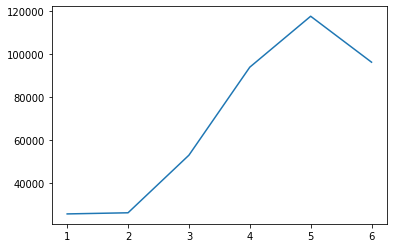

In [34]:
# 월별 이용건수 합 시각화 : 4월부터 이용수 많아짐
plt.plot(data_month)

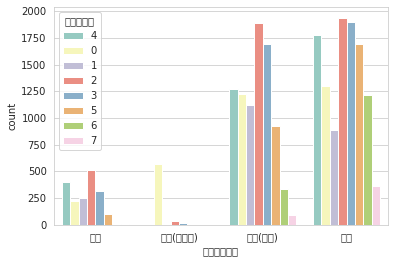

In [35]:
# 연령대별 대여구분코드 확인
import seaborn as sns
sns.set_style("whitegrid")
sns.countplot(data = data, x="대여구분코드", hue = "연령대코드", palette='Set3')

In [36]:
# 더 시각화하기

## 3. 데이터 스케일링

In [37]:
data

,월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,1,800,800. 목월공원 앞,단체,1,4,2,176.71,1.38,5949.60,120
1,1,800,800. 목월공원 앞,일일(비회원),0,0,2,120.28,1.08,4672.74,58
2,1,800,800. 목월공원 앞,일일(회원),0,1,6,535.00,4.34,18764.02,570
3,1,800,800. 목월공원 앞,일일(회원),0,2,14,1097.91,9.42,40631.75,379
4,1,800,800. 목월공원 앞,일일(회원),0,3,5,178.77,1.51,6497.15,140
...,...,...,...,...,...,...,...,...,...,...,...
22456,6,4639,4639. 동빙고근린공원,정기,1,3,8,686.79,5.67,24405.69,344
22457,6,4639,4639. 동빙고근린공원,정기,1,4,15,2900.89,22.47,96820.20,566
22458,6,4639,4639. 동빙고근린공원,정기,1,5,9,1600.71,14.41,62087.24,459
22459,6,4639,4639. 동빙고근린공원,정기,1,6,1,37.39,0.32,1388.41,9


In [38]:
data['대여구분코드'].value_counts()

정기         11077
일일(회원)      8557
단체          1817
일일(비회원)      631
Name: 대여구분코드, dtype: int64

In [39]:
# 대여구분코드 변수 바꾸기
# 대여구분코드 : 0=단체, 1=일일(비회원), 2=일일(회원), 3=정기
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(data['대여구분코드'])
labels = encoder.transform(data['대여구분코드'])
print(labels)

[0 1 2 ... 3 3 3]


In [40]:
data_new = data.insert(4, '대여구분', labels)

In [41]:
data_new = data.drop(['대여구분코드'], axis=1)
data_new

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,1,800,800. 목월공원 앞,0,1,4,2,176.71,1.38,5949.60,120
1,1,800,800. 목월공원 앞,1,0,0,2,120.28,1.08,4672.74,58
2,1,800,800. 목월공원 앞,2,0,1,6,535.00,4.34,18764.02,570
3,1,800,800. 목월공원 앞,2,0,2,14,1097.91,9.42,40631.75,379
4,1,800,800. 목월공원 앞,2,0,3,5,178.77,1.51,6497.15,140
...,...,...,...,...,...,...,...,...,...,...,...
22456,6,4639,4639. 동빙고근린공원,3,1,3,8,686.79,5.67,24405.69,344
22457,6,4639,4639. 동빙고근린공원,3,1,4,15,2900.89,22.47,96820.20,566
22458,6,4639,4639. 동빙고근린공원,3,1,5,9,1600.71,14.41,62087.24,459
22459,6,4639,4639. 동빙고근린공원,3,1,6,1,37.39,0.32,1388.41,9


In [42]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22082 entries, 0 to 22460
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월       22082 non-null  int64  
 1   대여소번호   22082 non-null  int64  
 2   대여소명    22082 non-null  object 
 3   대여구분    22082 non-null  int64  
 4   성별      22082 non-null  object 
 5   연령대코드   22082 non-null  object 
 6   이용건수    22082 non-null  int64  
 7   운동량     22082 non-null  float64
 8   탄소량     22082 non-null  float64
 9   이동거리    22082 non-null  float64
 10  이용시간    22082 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.5+ MB


In [43]:
data_new['성별'] = pd.to_numeric(data['성별'])

In [44]:
X = data_new[['월', '대여소번호', '연령대코드', '이용건수', '운동량', '탄소량', '이동거리', '이용시간']]
y = data_new['성별']

In [45]:
# train / test 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)

In [46]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16561, 8) (5521, 8) (16561,) (5521,)


## 4. KNN

### Grid Search

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [48]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [49]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 3}


In [50]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.461


In [51]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.460


In [52]:
result_grid= pd.DataFrame(grid_search.cv_results_)

### Random Search

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [54]:
param_distribs = {'n_neighbors': randint(low=1, high=20)}
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5c4e4758b0>},
                   return_train_score=True)

In [55]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'n_neighbors': 7}
Best Cross-validity Score: 0.447
Test set Score: 0.449


In [56]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028455,0.002223,0.109414,0.014229,4,{'n_neighbors': 4},0.434953,0.434179,0.444444,0.441123,...,0.438319,0.003896,4,0.657911,0.658314,0.660276,0.658918,0.658389,0.658762,0.000822
1,0.026870,0.001172,0.110424,0.004295,19,{'n_neighbors': 19},0.421672,0.421800,0.436292,0.430254,...,0.426484,0.005868,10,0.515550,0.519737,0.514378,0.513624,0.514001,0.515458,0.002235
2,0.026500,0.000220,0.112387,0.004988,15,{'n_neighbors': 15},0.431935,0.428442,0.442633,0.439614,...,0.436025,0.005157,7,0.541289,0.537248,0.535663,0.534455,0.531889,0.536109,0.003126
3,0.026291,0.000265,0.113462,0.013662,14,{'n_neighbors': 14},0.427709,0.432367,0.440821,0.443539,...,0.436266,0.005700,6,0.544158,0.544494,0.540645,0.540418,0.537927,0.541528,0.002477
4,0.027291,0.001559,0.109188,0.005146,13,{'n_neighbors': 13},0.430426,0.429650,0.447464,0.439915,...,0.437172,0.006589,5,0.550121,0.550306,0.547588,0.544871,0.545098,0.547597,0.002340
5,0.027702,0.001979,0.103394,0.002492,11,{'n_neighbors': 11},0.430727,0.442633,0.447766,0.446558,...,0.441399,0.006114,3,0.563255,0.563061,0.565401,0.563590,0.561778,0.563417,0.001167
6,0.026688,0.000940,0.108830,0.003686,15,{'n_neighbors': 15},0.431935,0.428442,0.442633,0.439614,...,0.436025,0.005157,7,0.541289,0.537248,0.535663,0.534455,0.531889,0.536109,0.003126
7,0.026880,0.000283,0.107901,0.003135,15,{'n_neighbors': 15},0.431935,0.428442,0.442633,0.439614,...,0.436025,0.005157,7,0.541289,0.537248,0.535663,0.534455,0.531889,0.536109,0.003126
8,0.028502,0.002620,0.117421,0.016303,7,{'n_neighbors': 7},0.440688,0.446558,0.452899,0.452597,...,0.447377,0.004767,1,0.605752,0.608121,0.600649,0.605329,0.605329,0.605036,0.002427
9,0.032002,0.004118,0.129357,0.011767,10,{'n_neighbors': 10},0.434048,0.434179,0.447464,0.451087,...,0.441942,0.006895,2,0.570426,0.570986,0.573477,0.570458,0.570760,0.571222,0.001147


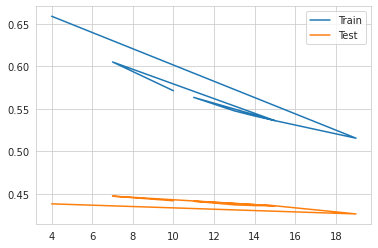

In [57]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_n_neighbors'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_neighbors'], result_random['mean_test_score'], label="Test")
plt.legend()

### 모델평가

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn_best=KNeighborsClassifier(n_neighbors=8)

In [60]:
knn_best.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
# Confusion matrix에서
pred_train=knn_best.predict(X_train) 
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[4901 1110  682]
 [2127 2896  288]
 [1964  529 2064]]


In [61]:
pred_test=knn_best.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)


테스트데이터 오차행렬:
 [[1310  566  356]
 [ 956  690  124]
 [ 858  223  438]]


In [62]:
# from sklearn.metrics import f1_score
# from sklearn.metrics import classification_report
# f1=f1_score(y_test, pred_test)
# print("f1 score:", f1,'\n')
# cfreport=classification_report(y_test, pred_test)
# print("분류예측 레포트:\n", cfreport)

## 5. Decision tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))
# 완전 과적합

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.509


In [65]:
# 과적합 낮추기 위해 max_depth 적용
tree = DecisionTreeClassifier(max_depth = 6, random_state = 0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test))) # 정확도 증가함

학습용 데이터 정확도: 0.458
시험용 데이터 정확도: 0.421


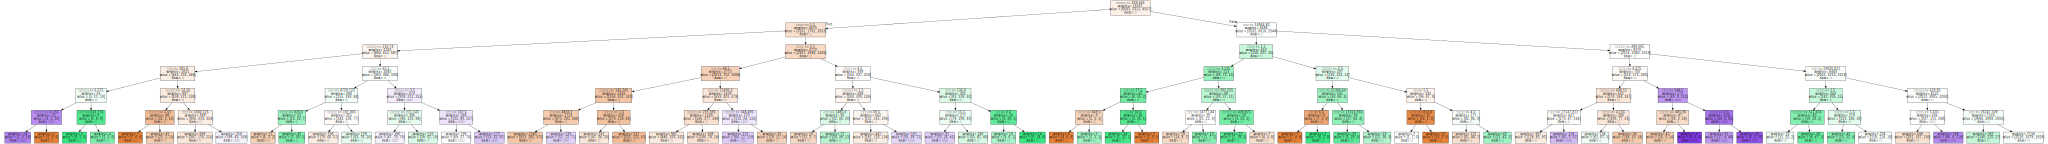

In [66]:
# graphviz 라이브러리를 이용하여 의사결정나무 그리기 
# feature_names 머지
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file = "tree.dot", class_names = [ "남", "여", "미기입"],
                feature_names = data_new.columns[1:9], 
                impurity = False, filled = True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [67]:
# 변수의 중요도 구하기
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.03280402 0.00885981 0.13735948 0.01955759 0.38669646 0.09622459
 0.22329697 0.09520108]


In [68]:
# 변수의 중요도 시각화
import numpy as np
# def plot_feature_importances_df_new(model):
    #plt.rcParams["figure.figsize"] = (9,6)
    #n_features = len(data_new.columns[1:])  # 30개 
    #plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    #plt.yticks(np.arange(n_features), data_new.columns[1:])
    #plt.xlabel("feature importance")
    #plt.ylabel("feature")
    #plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

# plot_feature_importances_df_new(tree)

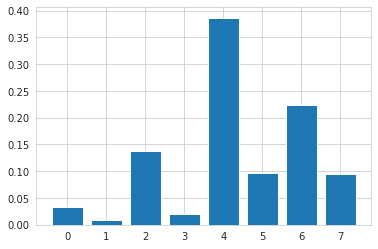

In [69]:
x = np.arange(8)
values = [0.03280402, 0.00885981, 0.13735948, 0.01955759, 0.38669646, 0.09622459, 0.22329697, 0.09520108]
plt.bar(x, values)
plt.show()

## 6. Random forest

### Grid Search

In [70]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators' : [10, 100], 
            'max_depth' : [6, 8, 10, 12]}
from sklearn.ensemble import RandomForestClassifier
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)

In [71]:
grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best Parameter: {'max_depth': 12, 'n_estimators': 100}
Best Cross-validity Score: 0.547
Test set Score: 0.552


In [72]:
result_grid= pd.DataFrame(grid_search.cv_results_)

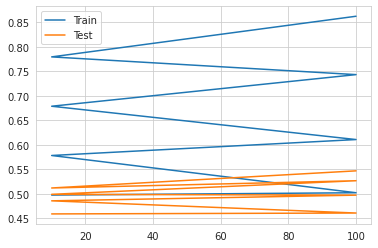

In [73]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

### Random Search

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
param_distribs = {'n_estimators': randint(low=1, high=10), 
                  'max_depth' : [6, 8, 10, 12]}

In [75]:
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [6, 8, 10, 12],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5c4ef892e0>},
                   return_train_score=True)

In [76]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'max_depth': 12, 'n_estimators': 7}
Best Cross-validity Score: 0.500
Test set Score: 0.510


In [77]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.060134,0.005576,0.006300,0.000174,6,4,"{'max_depth': 6, 'n_estimators': 4}",0.450649,0.446860,0.457428,...,0.451543,0.003987,5,0.492225,0.483961,0.481621,0.491131,0.496792,0.489146,0.005575
1,0.146841,0.007150,0.010379,0.000827,12,7,"{'max_depth': 12, 'n_estimators': 7}",0.510112,0.509662,0.487621,...,0.500090,0.009069,1,0.775740,0.751981,0.748585,0.768662,0.718394,0.752672,0.019900
2,0.046621,0.001121,0.006445,0.000064,12,2,"{'max_depth': 12, 'n_estimators': 2}",0.456384,0.439010,0.441425,...,0.442968,0.007430,8,0.634586,0.632953,0.618009,0.625481,0.609329,0.624072,0.009440
3,0.112394,0.007643,0.008784,0.000294,6,9,"{'max_depth': 6, 'n_estimators': 9}",0.471476,0.477657,0.457729,...,0.460237,0.012718,3,0.499094,0.505849,0.502453,0.506906,0.488037,0.500468,0.006794
4,0.111637,0.002452,0.009062,0.000748,6,9,"{'max_depth': 6, 'n_estimators': 9}",0.467854,0.467089,0.458937,...,0.464102,0.006145,2,0.495622,0.504415,0.515058,0.517096,0.498981,0.506234,0.008537
5,0.034563,0.003564,0.005680,0.000080,6,2,"{'max_depth': 6, 'n_estimators': 2}",0.439179,0.452899,0.427234,...,0.441097,0.008932,9,0.469203,0.468262,0.452487,0.463431,0.465771,0.463831,0.006018
6,0.025984,0.000583,0.005355,0.000114,8,1,"{'max_depth': 8, 'n_estimators': 1}",0.435859,0.430857,0.422403,...,0.428838,0.007092,10,0.466410,0.459129,0.464261,0.477998,0.461318,0.465823,0.006575
7,0.044743,0.001570,0.006611,0.000903,6,3,"{'max_depth': 6, 'n_estimators': 3}",0.458497,0.444143,0.442935,...,0.444839,0.008447,7,0.476600,0.475960,0.473168,0.477696,0.477244,0.476134,0.001595
8,0.088384,0.003836,0.007838,0.000264,6,7,"{'max_depth': 6, 'n_estimators': 7}",0.456082,0.466787,0.450181,...,0.456313,0.006071,4,0.487470,0.493396,0.504717,0.504264,0.507133,0.499396,0.007617
9,0.038605,0.001082,0.005915,0.000070,8,2,"{'max_depth': 8, 'n_estimators': 2}",0.449442,0.461051,0.439614,...,0.445021,0.012170,6,0.520003,0.509548,0.507812,0.501321,0.494679,0.506673,0.008482


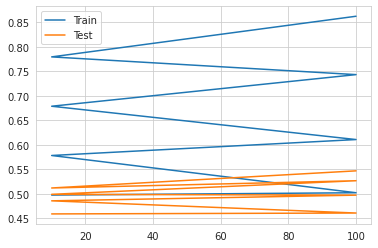

In [78]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

In [79]:
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(max_depth = 12, n_estimators = 6)
Forest.fit(X_train, y_train)
print("특성 중요도:\n{}".format(Forest.feature_importances_))

특성 중요도:
[0.0533759  0.10781904 0.09135616 0.0752864  0.23297579 0.14562758
 0.15155308 0.14200605]


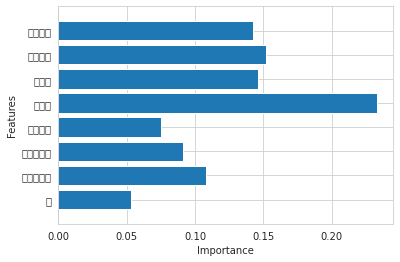

In [80]:
def plot_feature_importances_forest(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_forest(Forest)

In [81]:
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(max_depth = 12, n_estimators = 6)
Forest.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

In [82]:
pred_train=Forest.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[5434  800  459]
 [1291 3800  220]
 [1301  436 2820]]


In [83]:
pred_test=Forest.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[1309  554  369]
 [ 730  882  158]
 [ 696  272  551]]
